# Decomposition framework of the PySAL *segregation* module

First, let's import all the needed libraries.

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

import segregation
from segregation.decompose_segregation import Decompose_Segregation

In this example, we are going to use census data that the user must download its own copy, following similar guidelines explained in https://github.com/spatialucr/geosnap/tree/master/geosnap/data. You should download the full type file  of 2010. The zipped file download will have a name that looks like `LTDB_Std_All_fullcount.zip`. After extracting the zipped content, the filepath of the data should looks like this:

In [2]:
#filepath = '~/std_2010_fullcount.csv'
filepath = 'C:/Users/renan/Desktop/full_count_2010/std_2010_fullcount.csv'

In [3]:
df = pd.read_csv(filepath, encoding = "ISO-8859-1", sep = ",")

Read the map of all census tracts of US:

In [4]:
# This file can be download here: https://drive.google.com/open?id=1gWF0OCn6xuR_WrEj7Ot2jY6KI2t6taIm
with open('data/tracts_US.pkl', 'rb') as input:
    map_gpd = pickle.load(input)
    
map_gpd['INTGEOID10'] = pd.to_numeric(map_gpd["GEOID10"])
gdf_pre = map_gpd.merge(df, left_on = 'INTGEOID10', right_on = 'trtid10')
gdf = gdf_pre[['GEOID10', 'geometry', 'pop10', 'nhblk10']]

Read the correspondence table that relates the tract id with the corresponding Metropolitan area.

In [5]:
# You can download this file here: https://drive.google.com/open?id=10HUUJSy9dkZS6m4vCVZ-8GiwH0EXqIau
with open('data/tract_metro_corresp.pkl', 'rb') as input:
    tract_metro_corresp = pickle.load(input).drop_duplicates()

In [6]:
merged_gdf = gdf.merge(tract_metro_corresp, left_on = 'GEOID10', right_on = 'geoid10')
merged_gdf['compo']   = np.where(merged_gdf['pop10'] == 0, 0, merged_gdf['nhblk10'] / merged_gdf['pop10'])
merged_gdf.head()

,GEOID10,geometry,pop10,nhblk10,geoid10,metro_id,numeric_id,geoid,name,compo
0,01001020801,"POLYGON ((-86.456273 32.405837, -86.4570349999...",3081,293,01001020801,33860,33860,33860,"Montgomery, AL",0.095099
1,01001020802,"POLYGON ((-86.412497 32.589422, -86.412442 32....",10435,1420,01001020802,33860,33860,33860,"Montgomery, AL",0.136080
2,01001020200,"POLYGON ((-86.467354 32.459308, -86.46764 32.4...",2170,1226,01001020200,33860,33860,33860,"Montgomery, AL",0.564977
3,01001020700,"POLYGON ((-86.46106999999999 32.42709, -86.461...",2891,452,01001020700,33860,33860,33860,"Montgomery, AL",0.156347
4,01001020600,"POLYGON ((-86.470524 32.456117, -86.4700469999...",3668,776,01001020600,33860,33860,33860,"Montgomery, AL",0.211559


(-119.02865769999998, -117.3360503, 32.6463769, 34.9269651)

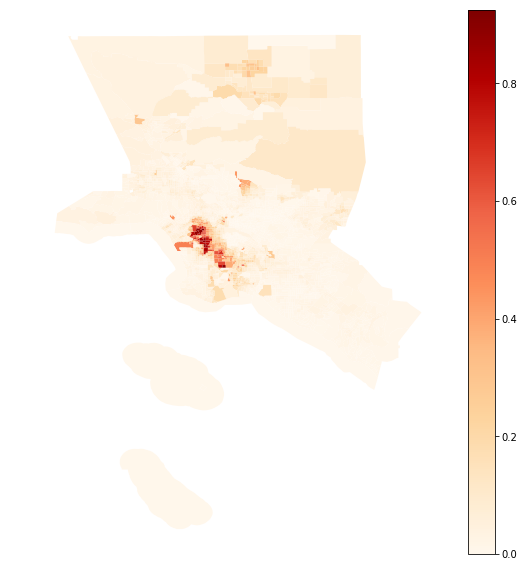

In [7]:
la_2010 = merged_gdf.loc[(merged_gdf.name == "Los Angeles-Long Beach-Anaheim, CA")]
la_2010.plot(column = 'compo', figsize = (10, 10), cmap = 'OrRd', legend = True)
plt.axis('off')

(-75.5381038, -71.59841419999998, 39.36886419999999, 41.70820779999999)

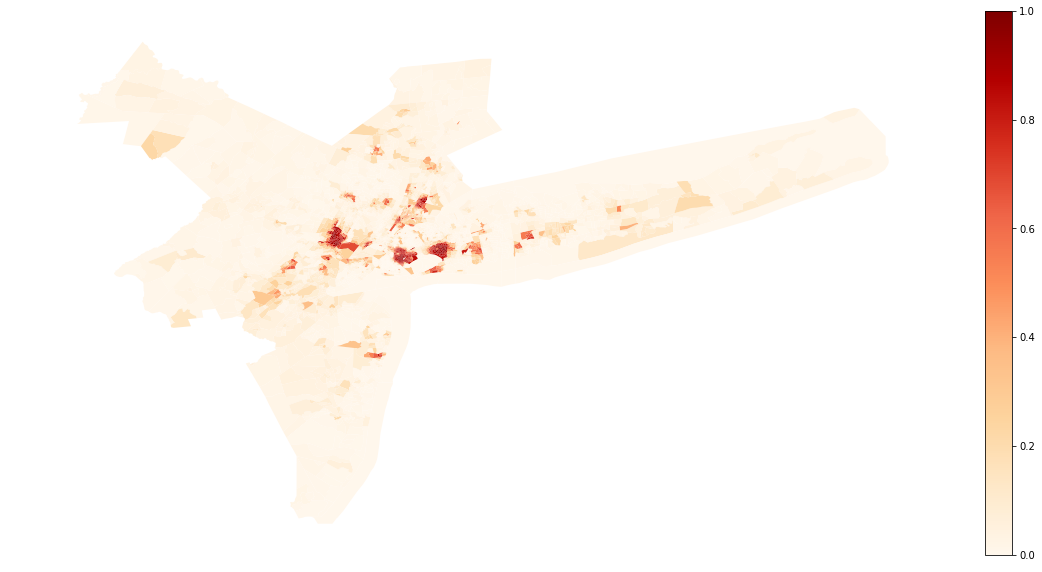

In [8]:
ny_2010 = merged_gdf.loc[(merged_gdf.name == 'New York-Newark-Jersey City, NY-NJ-PA')]
ny_2010.plot(column = 'compo', figsize = (20, 10), cmap = 'OrRd', legend = True)
plt.axis('off')

In [9]:
from segregation.non_spatial_indexes import Gini_Seg

In [10]:
G_la = Gini_Seg(la_2010, 'nhblk10', 'pop10')
G_ny = Gini_Seg(ny_2010, 'nhblk10', 'pop10')

## Composition Approach

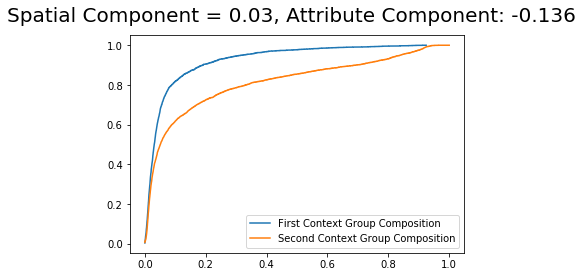

In [14]:
DS_composition = Decompose_Segregation(G_la, G_ny)
DS_composition.plot(plot_type = 'cdfs')

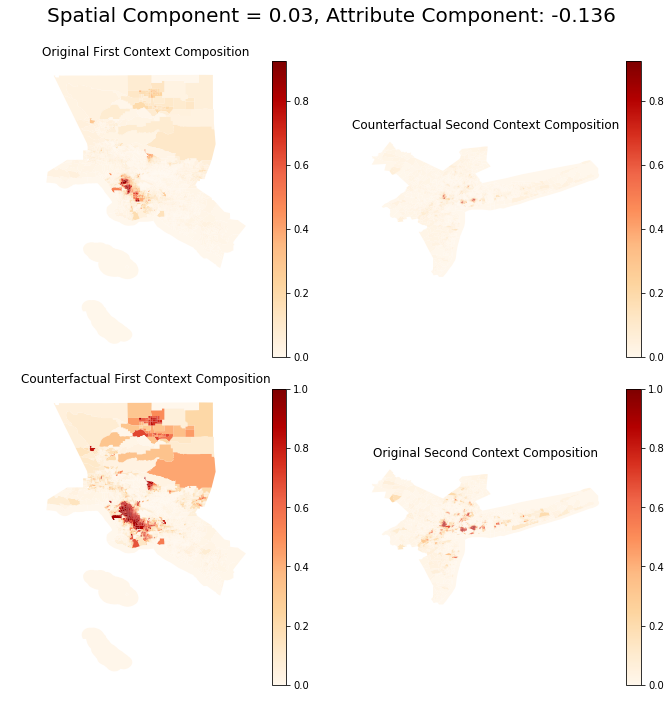

In [15]:
DS_composition.plot(plot_type = 'maps')

## Share Approach

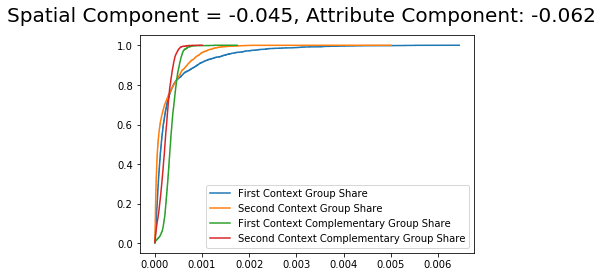

In [16]:
DS_share = Decompose_Segregation(G_la, G_ny, counterfactual_approach = 'share')
DS_share.plot(plot_type = 'cdfs')

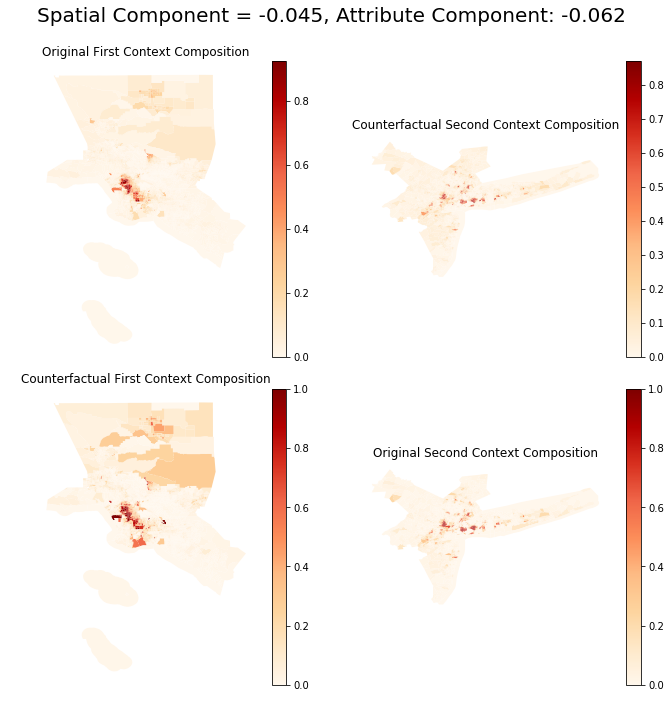

In [17]:
DS_share.plot(plot_type = 'maps')